### CUNY Hackathon: Analyzing the risk and returns of stocks

In [716]:
#Import required libraries
#!pip install iexfinance
#!pip install pyEX
#import pandas as pd
#import numpy as np
#import matplotlib.pyplot as plt
#import pandas_datareader as pdr
#from scipy import stats
#import seaborn as sns

#from iexfinance.stocks import Stock
#import pyEX as p


symbol = input('Please enter the stock you are interested in:')

Please enter the stock you are interested in:TSLA


In [717]:
c= p.Client(api_token = 'Tpk_3cd1f8cfeb4a4f849c4b5688a752e3d4', version = 'sandbox')

In [718]:
def get_data(symbol):
    global stock
    stock = c.chartDF(symbol, timeframe = '5y')
    global stock_df
    stock_df= stock[['open', 'close', 'high', 'low', "volume"]]
    
    return stock_df

In [719]:
stock = get_data(symbol)
stock.head()

,open,close,high,low,volume
date,,,,,
2021-01-22,859.26,873.74,871.0000,831.4500,20302676
2021-01-21,874.00,872.94,880.7153,853.5849,21567463
2021-01-20,885.24,855.39,887.4000,848.5600,26758030
2021-01-19,865.90,869.76,866.0000,838.0000,25902685
2021-01-15,885.00,832.67,894.3000,826.1000,38826567


In [720]:
SP500= pdr.get_data_yahoo("^GSPC",
                          start = "2016-01-25",
                          end= "2021-01-22")

In [721]:
SP500= SP500.sort_index(ascending = False)

## 2. Graph the closing price over the years

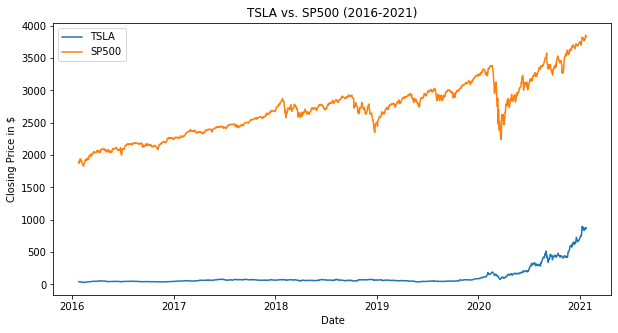

In [722]:
#Define the x and y labels for the graph

plt.figure(figsize= (10,5))

x = stock.index     #Date
y= stock['close']   #Price

x1= SP500.index
y1= SP500['Close']

plt.xlabel("Date")
plt.ylabel("Closing Price in $")

plt.plot(x,y)
plt.plot(x1,y1)
plt.title(f"{symbol} vs. SP500 (2016-2021)")
plt.legend([f"{symbol}", "SP500"])

##### Clearly, this does not give us a good comparison. We have to calculate the % change.

## 3. Calculate the monthly and daily percentage change

In [723]:
#Calculate the percentage change of the adjusted close, including all rows 
#but the first one (daily& monthly)
stock_daily_returns = stock['close'].pct_change()[1:]
stock_monthly_returns= stock["close"].resample("M").ffill().pct_change()

SP500_daily_returns = SP500["Close"].pct_change()[1:]
SP500_monthly_returns= SP500["Close"].resample("M").ffill().pct_change()

In [724]:
SP500_daily_returns.head()

Date
2021-01-21    0.003020
2021-01-20   -0.000317
2021-01-19   -0.013744
2021-01-15   -0.008071
2021-01-14    0.007242
Name: Close, dtype: float64

## 4. Plot the monthly returns of the stock and the S&P500

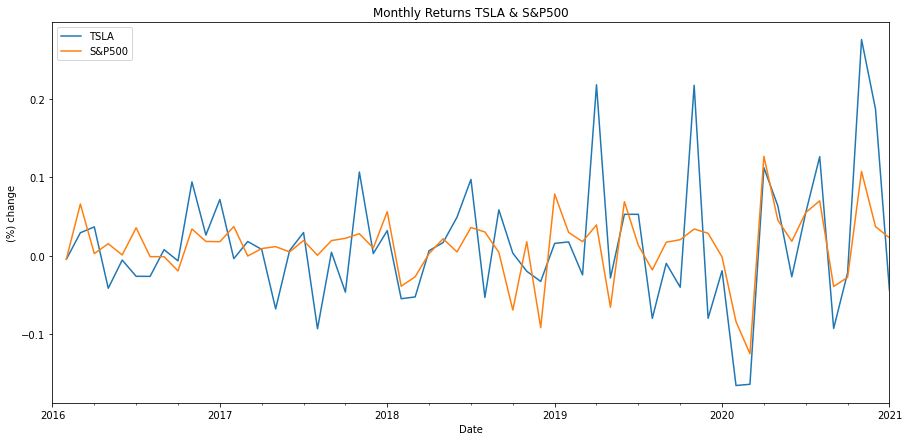

In [725]:
plt.figure(figsize= (15,7)) 
tsla_monthly_returns.plot()
SP500_monthly_returns.plot()

plt.xlabel("Date")
plt.ylabel("(%) change")
plt.title(f"Monthly Returns {symbol} & S&P500")
plt.legend([f"{symbol}", "S&P500"])
plt.show()

### 5. Graph the monthly returns of the stock vs. S&P500 returns

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


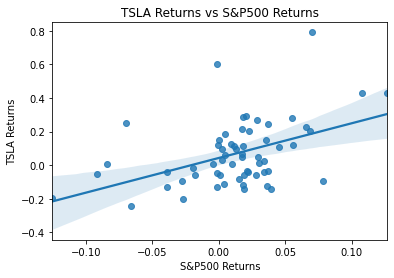

In [726]:
fig, ax = plt.subplots()

sns.regplot(SP500_monthly_returns.values,
stock_monthly_returns.values)
plt.xlabel("S&P500 Returns")
plt.ylabel(f"{symbol} Returns")
plt.title(f"{symbol} Returns vs S&P500 Returns")
plt.show()

## 6. Calculate the Beta and Alpha Value of the stock against the S&P500

In [727]:
(beta, alpha) = stats.linregress(SP500_daily_returns, stock_daily_returns.values)[0:2]

In [728]:
if beta >= 1:
  print(f"{symbol} is considered an aggressive stock, because its beta value \nis {round(beta, 3)} and its alpha is {round(alpha, 3)}")
else:
  print(f"{symbol} is considered a defensive stock, because its beta value \nis {round(beta, 3)} and its alpha is {round(alpha, 3)}")

TSLA is considered an aggressive stock, because its beta value 
is 1.317 and its alpha is -0.001


## 8. Find the Standard deviation on monthly returns

In [729]:
# changed the time frame from 5 years to 1 year for the regression model

def get_data2(symbol):
    global stock2
    stock2 = c.chartDF(symbol, timeframe = '1y')
    global stock_df2
    stock_df2 = stock2[['open', 'close', 'high', 'low', "volume"]]
    
    return stock_df2

print(get_data2(symbol))

               open    close     high       low     volume
date                                                      
2021-01-22  865.700  852.580  862.000  852.7200   20608796
2021-01-21  866.000  872.700  857.932  881.4685   20757550
2021-01-20  893.760  865.760  860.200  850.9600   26412747
2021-01-19  850.400  862.660  854.000  855.0000   25916587
2021-01-15  878.000  860.710  892.900  825.3000   40678804
...             ...      ...      ...       ...        ...
2020-01-30  131.072  130.048  132.675  123.8000  145115783
2020-01-29  120.132  116.706  120.110  115.5310   92365166
2020-01-28  116.006  115.330  121.018  116.1600   61323896
2020-01-27  113.090  116.583  116.682  113.0900   71285095
2020-01-24  117.489  113.422  116.318  111.8590   75295442

[252 rows x 5 columns]


In [730]:
print(f"The Standard Deviation of {symbol} is:", round(stock_monthly_returns.std(),3))

The Standard Deviation of TSLA is: 0.193


In [731]:
# !pip install sklearn

### First, we must check if there is a linear relationship between the closing and the opening price using a Scatter plot

To predict the closing price based on the opening price, there has to be a strong linear relationship.

Text(0, 0.5, 'Close Price')

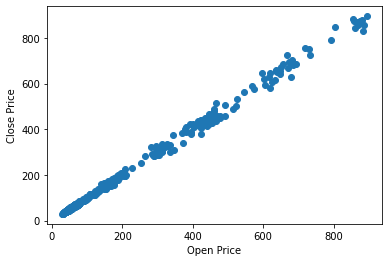

In [732]:
plt.scatter(stock.open, stock.close)
plt.xlabel("Open Price")
plt.ylabel("Close Price")

# **Starting to implement a regression model. We'll be utilizing data from the past year of stock performance to determine what the closing prices will be for the next 7 days.**

In [733]:
import numpy as np
from sklearn import preprocessing

stock_df2 = stock_df2[['close']]

# assigning the number of days we want to predict, which is the next 7 days
forecast_price = int(7)

# adding a column named prediction for our output
stock_df2['Prediction'] = stock_df2[['close']].shift(-forecast_price)

print(stock_df2.tail())

# making the column with closing prices into an array and scaling/normalizing it
X = np.array(stock_df2.drop(['Prediction'], 1))

X = preprocessing.scale(X)

              close  Prediction
date                           
2020-01-30  130.048         NaN
2020-01-29  116.706         NaN
2020-01-28  115.330         NaN
2020-01-27  116.583         NaN
2020-01-24  113.422         NaN


In [734]:
# setting new input variable to the last 30 days (because they are empty) and removing them from the X array
X_forecast = X[-forecast_price:] 
X = X[:-forecast_price]

# since we want our output (y value) to be the predicted stock prices, we'll asign the Prediction column to y
y = np.array(stock_df2['Prediction'])
y = y[:-forecast_price]

In [735]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# splitting our data set into testing and training sets to equal 30% of the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# fitting the model
clf = LinearRegression().fit(X_train,y_train)

# finding the accuracy and converting it to a percentage
def percentage():
  score = clf.score(X_test, y_test)
  return 100 * float(score)

print(f'The model accuracy for {symbol} is: {percentage()} %')

# predicting the close price of the stock for the next 7 days 
print('The closing price prediction for the next 7 days is:',clf.predict(X_forecast))


The model accuracy for TSLA is: 96.04244394227823 %
The closing price prediction for the next 7 days is: [154.74012507 134.97522184 129.61763973 117.62621875 116.38950796
 117.51566974 114.67465028]
